Populating the interactive namespace from numpy and matplotlib
1,037,619.7512


`%matplotlib` prevents importing * from pylab and numpy


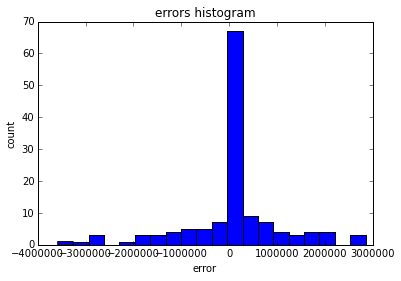

In [17]:
%pylab inline
import pandas as pd
from sklearn.cross_validation import LeaveOneOut
from sklearn import tree


train_df = pd.read_csv('train.csv', parse_dates=[1],index_col='Id')
train_df = train_df[train_df['revenue']<10000000]

train_df = train_df.replace(0, np.nan)
train_df = train_df.dropna(axis=1,thresh=80)
train_df = train_df.replace('IL',0)
train_df = train_df.replace('FC',0)
train_df = train_df.replace('DT',0)
train_df['Open_Year'] = train_df['Open Date'].map( lambda x : x.year)

X = pd.DataFrame(train_df,columns = ['Open_Year','P2','P28'])
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X.values, train_df['revenue'])
predicty = clf.predict(X.values)
errors = predicty - train_df['revenue']
RMSE = sqrt(np.mean(errors ** 2))
print '{:,}'.format(RMSE)

pylab.hist(errors,bins=20)
pylab.title('errors histogram')
pylab.xlabel('error')
pylab.ylabel('count')
pylab.show()

In [16]:
print train_df.shape

(134, 26)


In [18]:
print X.shape

(134, 3)


In [31]:
loo = LeaveOneOut(134)
features = ['Open_Year','P2','P28']
test_1_predicts = []
errs = []
for train_idx, test_idx in loo:
    train_1 = train_df.iloc[ train_idx ]
    test_1 = train_df.iloc[ test_idx ]
    X = train_1[ features ]
    x_1 = test_1[ features ]
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X.values, train_1['revenue'])
    
    y_1_hat = clf.predict(x_1)
    test_1_predicts.append(y_1_hat)
    
    y_1 = test_1.revenue.iloc[0]
    errs.append(y_1_hat - y_1)
    #test_1_pred = train_1.revenue.mean()
    #test_1_predicts.append(test_1_pred)
    #test_1_label = train_df_wo_outliers.iloc[ test ].revenue.iloc[0]
    #errs.append(test_1_pred - test_1_label)

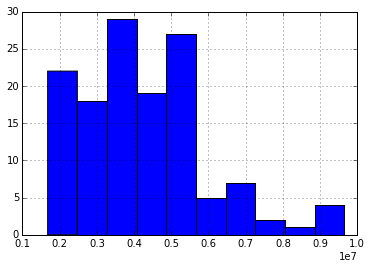

In [32]:
pd.Series(data=test_1_predicts).hist()

In [24]:
err_series = pd.Series(data=errs)

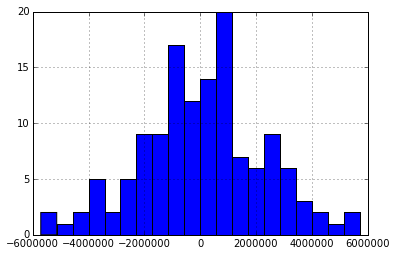

In [34]:
err_series.hist(bins=20)

In [28]:
test_rmse = sqrt( np.mean(err_series ** 2) )
print 'Cross validation estimated test error (RMSE) : \n'
print "{:,}".format(test_rmse[0])
#print test_rmse

Cross validation estimated test error (RMSE) : 

2,168,196.60605
